In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [18]:
df = pd.read_csv('co2_emissions.csv')

In [19]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   make                              7385 non-null   object 
 1   model                             7385 non-null   object 
 2   vehicle_class                     7385 non-null   object 
 3   engine_size(l)                    7385 non-null   float64
 4   cylinders                         7385 non-null   int64  
 5   transmission                      7385 non-null   object 
 6   fuel_type                         7385 non-null   object 
 7   fuel_consumption_city_(l/100_km)  7385 non-null   float64
 8   fuel_consumption_hwy_(l/100_km)   7385 non-null   float64
 9   fuel_consumption_comb_(l/100_km)  7385 non-null   float64
 10  fuel_consumption_comb_(mpg)       7385 non-null   int64  
 11  co2_emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [35]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

### EDA

#### Check NULL values

In [43]:
df.isna().sum()

make                                0
model                               0
vehicle_class                       0
engine_size(l)                      0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city_(l/100_km)    0
fuel_consumption_hwy_(l/100_km)     0
fuel_consumption_comb_(l/100_km)    0
fuel_consumption_comb_(mpg)         0
co2_emissions(g/km)                 0
dtype: int64

There is no null values in this dataset.

In [42]:
categorical = [
    'make', 'model', 'vehicle_class', 'transmission', 'fuel_type'
]

numerical = [
    'engine_size(l)', 'fuel_consumption_city_(l/100_km)', 'fuel_consumption_hwy_(l/100_km)', 
    'fuel_consumption_comb_(l/100_km)', 'fuel_consumption_comb_(mpg)'
]

Normally we perform EDA on df_full_train dataset. I split the data in 60% train / 20% validation / 20% test dataset.

In [39]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=13)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=13)

In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_full = df_full_train['co2_emissions(g/km)'].values
y_train = df_train['co2_emissions(g/km)'].values
y_val = df_val['co2_emissions(g/km)'].values
y_test = df_test['co2_emissions(g/km)'].values

In [44]:
df_full_train[numerical].describe()

,engine_size(l),fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg)
count,5908.000000,5908.000000,5908.000000,5908.000000,5908.000000
mean,3.150254,12.560782,9.047072,10.979926,27.463439
std,1.343718,3.501702,2.229913,2.895802,7.217029
min,0.900000,4.200000,4.000000,4.100000,11.000000
25%,2.000000,10.100000,7.500000,8.900000,22.000000
50%,3.000000,12.100000,8.700000,10.600000,27.000000
75%,3.700000,14.600000,10.200000,12.600000,32.000000
max,8.400000,30.600000,20.600000,26.100000,69.000000


Plot histograms with kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution. Plot box plots as well to understand outliers.

<AxesSubplot:xlabel='fuel_consumption_hwy_(l/100_km)'>

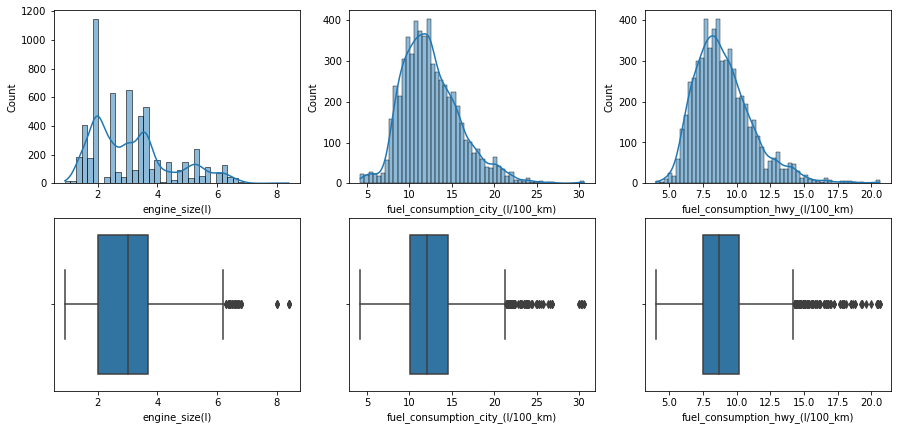

In [46]:
_, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
sns.histplot(data=df_full_train, x="engine_size(l)", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="fuel_consumption_city_(l/100_km)", kde=True, ax=axes[0, 1])
sns.histplot(data=df_full_train, x="fuel_consumption_hwy_(l/100_km)", kde=True, ax=axes[0, 2])
sns.boxplot(data=df_full_train, x="engine_size(l)", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="fuel_consumption_city_(l/100_km)", ax=axes[1, 1])
sns.boxplot(data=df_full_train, x="fuel_consumption_hwy_(l/100_km)", ax=axes[1, 2])

<AxesSubplot:xlabel='fuel_consumption_comb_(mpg)'>

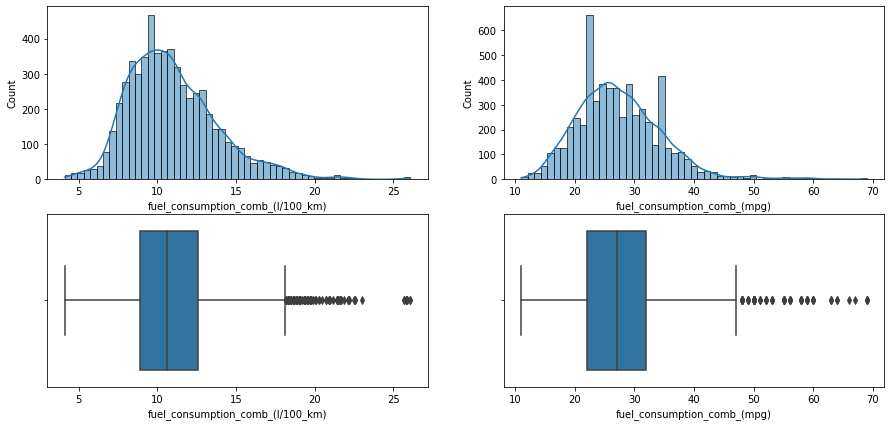

In [48]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
sns.histplot(data=df_full_train, x="fuel_consumption_comb_(l/100_km)", kde=True, ax=axes[0, 0])
sns.histplot(data=df_full_train, x="fuel_consumption_comb_(mpg)", kde=True, ax=axes[0, 1])
sns.boxplot(data=df_full_train, x="fuel_consumption_comb_(l/100_km)", ax=axes[1, 0])
sns.boxplot(data=df_full_train, x="fuel_consumption_comb_(mpg)", ax=axes[1, 1])

Let's examine target variable as well.

<AxesSubplot:xlabel='co2_emissions(g/km)'>

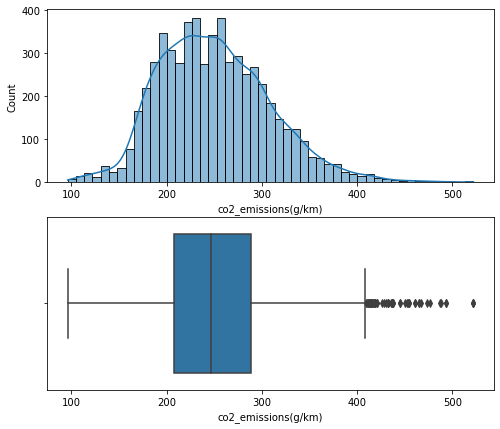

In [53]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 7))
sns.histplot(data=df_full_train, x="co2_emissions(g/km)", kde=True, ax=axes[0])
sns.boxplot(data=df_full_train, x="co2_emissions(g/km)", ax=axes[1])

**How are numerical features correlated?**

In [54]:
df_full_train[numerical].corr()

,engine_size(l),fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg)
engine_size(l),1.000000,0.830037,0.761346,0.816093,-0.757543
fuel_consumption_city_(l/100_km),0.830037,1.000000,0.948329,0.993798,-0.926023
fuel_consumption_hwy_(l/100_km),0.761346,0.948329,1.000000,0.977419,-0.889425
fuel_consumption_comb_(l/100_km),0.816093,0.993798,0.977419,1.000000,-0.924410
fuel_consumption_comb_(mpg),-0.757543,-0.926023,-0.889425,-0.924410,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Numerical Features'}>

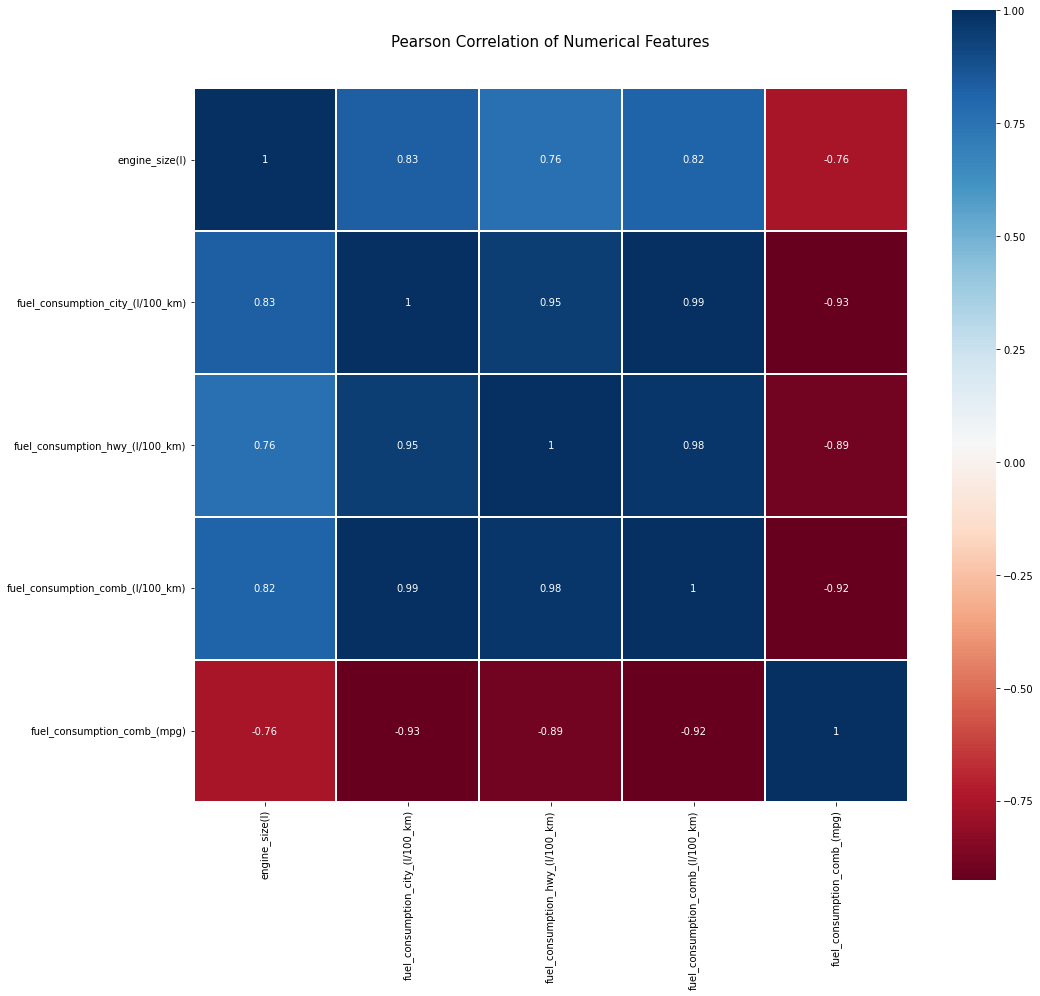

In [55]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Numerical Features', y=1.05, size=15)
sns.heatmap(df_full_train[numerical].corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)